# Jupyter Notebook

In [38]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


# Summary
A breakout player is defined by a player that was originally ranked at an Average Draft Position (ADP), the average position that players were chosen in the most popular fantasy football league hosts, greater than 150 and ended with a post-season rank, the rank of a player determined by their performance during the past season, less than 50. This is considered a breakout player because the value of the player increased by 100 positions or greater because of their performance during the season, indicating that they did much better than expected. 


# Wide Receiver Statistics Data Sets

Importing datasets with advanced wide receiver statistics (rushing yards, etc.) for all players between the years 2013 and 2022. This is public knowledge and is free to use. Advanced wide receiver statistics were not recorded prior to 2013 which is why are data is limited to this time. Adding a year column to all datasets with the respective year in order to compare players that appear multiple times throughout the years.

In [74]:
#wide receiver stats
wr_stats_2021 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2021.csv')
wr_stats_2021['Year'] = '2021'
wr_stats_2020 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2020.csv')
wr_stats_2020['Year'] = '2020'
wr_stats_2019 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2019.csv')
wr_stats_2019['Year'] = '2019'
wr_stats_2018 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2018.csv')
wr_stats_2018['Year'] = '2018'
wr_stats_2017 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2017.csv')
wr_stats_2017['Year'] = '2017'
wr_stats_2016 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2016.csv')
wr_stats_2016['Year'] = '2016'
wr_stats_2015 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2015.csv')
wr_stats_2015['Year'] = '2015'
wr_stats_2014 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2014.csv')
wr_stats_2014['Year'] = '2014'
wr_stats_2013 = pd.read_csv('data/post-season data/FantasyPros_Fantasy_Football_Advanced_Stats_Report_WR_2013.csv')
wr_stats_2013['Year'] = '2013'

Creating a large dataset with all the wide reciever statistics from 2013 to 2021 using the previously imported data sets. Selected for specific statistics we could analyze to provide insights into players- AIR (Air yards: receiving yards not including yards after catch), AIR/R (air yards per reception), YDS (total reception yards over entire season), Y/R (yards per reception), and number of plays over a certain number of yards (10, 20, 30, 40 , 50)

In [76]:
#wr large dataset
wr_table = pd.concat([wr_stats_2021,wr_stats_2020,wr_stats_2019,wr_stats_2018,wr_stats_2017,wr_stats_2016,wr_stats_2015,wr_stats_2014,wr_stats_2013])
wr_table = wr_table[["Player", "Year", "Y/R", "YBC/R", "AIR/R", "YAC/R", "YACON/R", "10+ YDS", "20+ YDS", "30+ YDS", "40+ YDS", "50+ YDS"]]
wr_table['Player'] = wr_table['Player'].str.replace(r"\(.*\)","")
wr_table



/var/folders/7w/27nqw85j0bz28dhxb722hln80000gn/T/ipykernel_13924/2774796106.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  wr_table['Player'] = wr_table['Player'].str.replace(r"\(.*\)","")


,Player,Year,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS
0,Cooper Kupp,2021,13.4,7.6,7.6,5.8,1.8,66.0,30.0,15.0,9.0,3.0
1,Deebo Samuel,2021,18.9,8.0,8.0,11.0,3.8,52.0,24.0,13.0,10.0,6.0
2,Ja'Marr Chase,2021,18.0,9.9,9.9,8.0,3.1,51.0,22.0,13.0,8.0,6.0
3,Justin Jefferson,2021,14.9,10.5,10.5,4.4,1.4,67.0,27.0,11.0,5.0,2.0
4,Davante Adams,2021,12.6,7.8,7.8,4.8,1.2,66.0,19.0,12.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
168,Brian Tyms,2013,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,Armanti Edwards,2013,10.0,4.0,4.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0
170,Stephen Williams,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,NaN,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ADP Data Sets

Importing datasets with ADP (average draft position) values for all players across the years from 2013 to 2021. This is public knowledge and free to use. Adding a year column to all datasets with the respective year in order for comparison between players when they show up multiple times throughout the years. The purpose of this dataset is to find the ADP which is the metric we are using to determine whether a player was expected to be "good" or "bad" before the season began. The ADP will be compared with post-season ranking in order to determine whether a player falls under the parameters of a "breakout player". 

In [42]:
#overall adp files

overall_adp_2021 = pd.read_csv('data/pre-season data/FantasyPros_2021_Overall_ADP_Rankings.csv')
overall_adp_2021['Year'] = '2021'

overall_adp_2020 = pd.read_csv('data/pre-season data/FantasyPros_2020_Overall_ADP_Rankings.csv')
overall_adp_2020['Year'] = '2020'

overall_adp_2019 = pd.read_csv('data/pre-season data/FantasyPros_2019_Overall_ADP_Rankings.csv')
overall_adp_2019['Year'] = '2019'

overall_adp_2018 = pd.read_csv('data/pre-season data/FantasyPros_2018_Overall_ADP_Rankings.csv')
overall_adp_2018['Year'] = '2018'

overall_adp_2017 = pd.read_csv('data/pre-season data/FantasyPros_2017_Overall_ADP_Rankings.csv')
overall_adp_2017['Year'] = '2017'

overall_adp_2016 = pd.read_csv('data/pre-season data/FantasyPros_2016_Overall_ADP_Rankings.csv')
overall_adp_2016['Year'] = '2016'

overall_adp_2015 = pd.read_csv('data/pre-season data/FantasyPros_2015_Overall_ADP_Rankings.csv')
overall_adp_2015['Year'] = '2015'

overall_adp_2014 = pd.read_csv('data/pre-season data/FantasyPros_2014_Overall_ADP_Rankings.csv')
overall_adp_2014['Year'] = '2014'

overall_adp_2013 = pd.read_csv('data/pre-season data/FantasyPros_2013_Overall_ADP_Rankings.csv')
overall_adp_2013['Year'] = '2013'

# Season Ranking Data Sets

Importing datasets with the End of Season ranking for all players across the years from 2013 to 2021. Adding a year column to all datasets with the respective year in order for comparison when a player shows up multiple times between the years.

In [43]:
#end of season overall rankings 
overall_rankings_2021 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2021.csv')
overall_rankings_2021['Year'] = '2021'

overall_rankings_2020 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2020.csv')
overall_rankings_2020['Year'] = '2020'

overall_rankings_2019 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2019.csv')
overall_rankings_2019['Year'] = '2019'

overall_rankings_2018 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2018.csv')
overall_rankings_2018['Year'] = '2018'

overall_rankings_2017 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2017.csv')
overall_rankings_2017['Year'] = '2017'

overall_rankings_2016 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2016.csv')
overall_rankings_2016['Year'] = '2016'

overall_rankings_2015 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2015.csv')
overall_rankings_2015['Year'] = '2015'

overall_rankings_2014 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2014.csv')
overall_rankings_2014['Year'] = '2014'

overall_rankings_2013 = pd.read_csv('data/FantasyPros_Fantasy_Football_Points_PPR_2013.csv')
overall_rankings_2013['Year'] = '2013'

Merged all the ADP data sets into one large dataset comprehensive of years from 2013 to 2021. Merged all the End of Season Overall rankings into one large dataframe comprehensive of years from 2013 to 2021. Merged the ADP and End of Season Overall rankings tables into one overall table.

In [44]:
#giant datatable final
adp_table = pd.concat([overall_adp_2021, overall_adp_2020, overall_adp_2019, overall_adp_2018, overall_adp_2017, overall_adp_2016, overall_adp_2015, overall_adp_2014, overall_adp_2013], axis=0)
overall_rankings_table = pd.concat([overall_rankings_2021, overall_rankings_2020, overall_rankings_2019, overall_rankings_2018, overall_rankings_2017, overall_rankings_2016, overall_rankings_2015, overall_rankings_2014, overall_rankings_2013], axis=0)
overall_merged = adp_table.merge(overall_rankings_table, how= 'outer', on = ['Player', 'Year'])

overall_merged

,Rank_x,Player,Team_x,Bye,POS,MFL,Fantrax,RTSports,FFC,Sleeper,AVG,Year,ESPN,Rank_y,Team_y,Position,Points,Games,Avg
0,1.0,Christian McCaffrey,SF,6,RB1,1.0,1.0,NaN,1.0,1.0,1.0,2021,NaN,168.0,CAR,RB,127.5,7.0,18.2
1,2.0,Dalvin Cook,MIN,7,RB2,2.0,2.0,NaN,2.0,2.0,2.0,2021,NaN,68.0,MIN,RB,206.3,13.0,15.9
2,3.0,Derrick Henry,TEN,13,RB3,3.0,3.0,NaN,3.0,3.0,3.0,2021,NaN,79.0,TEN,RB,193.3,8.0,24.2
3,4.0,Alvin Kamara,NO,6,RB4,4.0,4.0,NaN,4.0,4.0,4.0,2021,NaN,48.0,NO,RB,234.7,13.0,18.1
4,5.0,Ezekiel Elliott,DAL,7,RB5,5.0,5.0,NaN,5.0,5.0,5.0,2021,NaN,35.0,DAL,RB,252.1,17.0,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,NaN,Tyler Clutts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN,651.0,Multi,RB,-0.6,7.0,-0.1
6840,NaN,Chase Daniel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN,653.0,KC,QB,-0.8,4.0,-0.2
6841,NaN,Devon Wylie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN,655.0,TEN,WR,-2.0,2.0,-1.0
6842,NaN,Greg Jenkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN,655.0,LV,WR,-2.0,5.0,-0.4


# Cleaned WR Data Set

Cleaned data set by dropping unnecessary columns- RTSports, Sleeper, MFL, Fantrax, FFC, POS, Team_y -due to being unneccary for analysis or having too many NaN values to significantly analyze. Sorted data for all those in a Wide Receiver position and dropped all players who had NaN values for their ADP, as this signifies they didn't have any pre-season predictions and thus cannot be analyzed.

In [45]:
#cleaned overall_merged_data df
# dropped 'RTSports' and 'Sleeper' column - Had a lot of NaN values 
# dropped 'MFL','Fantrax', and 'FFC'
# dropped 'POS', Team_y - duplicated from merging 
# sort for wide receiver
# take out people with NaN ADP

def clean_data(data_file):
    data_file2 = data_file.drop(columns=['RTSports', 'Sleeper', 'MFL', 'Fantrax', 'FFC', 'POS','Team_y', 'ESPN', 'Bye', 'Team_x'])
    data_file3 = data_file2.rename(columns = {"Rank_x": "Preseason_rank","Team_x":"Team", "Rank_y": "Postseason_rank", "AVG": "ADP", "Avg": "PPG"})
    data_file4 = data_file3.loc[data_file3.Position == 'WR']
    data_file5 = data_file4.dropna(subset=['ADP'])
    return data_file5

overall_merged_data_clean = clean_data(overall_merged)
overall_merged_data_clean

,Preseason_rank,Player,ADP,Year,Postseason_rank,Position,Points,Games,PPG
7,8.0,Davante Adams,8.3,2021,8.0,WR,344.3,16.0,21.5
10,11.0,Tyreek Hill,11.0,2021,21.0,WR,296.5,17.0,17.4
15,16.0,Stefon Diggs,16.3,2021,23.0,WR,285.5,17.0,16.8
17,18.0,DK Metcalf,18.5,2021,39.0,WR,244.3,17.0,14.4
19,20.0,DeAndre Hopkins,19.8,2021,132.0,WR,147.2,10.0,14.7
...,...,...,...,...,...,...,...,...,...
3892,454.0,Stedman Bailey,458.0,2013,345.0,WR,41.6,15.0,2.8
3910,472.0,Eddie Royal,476.0,2013,119.0,WR,144.1,14.0,10.3
3914,476.0,Marvin Jones Jr.,480.0,2013,82.0,WR,171.6,15.0,11.4
3917,479.0,Jerricho Cotchery,483.0,2013,104.0,WR,154.2,15.0,10.3


In [46]:
# rank + stats
full = wr_table.merge(overall_merged_data_clean, how= 'outer', on = ['Player', 'Year'])
full = full.dropna(subset=['Player', 'ADP'])

full

,Player,Year,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,Preseason_rank,ADP,Postseason_rank,Position,Points,Games,PPG
708,DeVante Parker,2018,12.9,9.0,9.0,3.9,1.5,11.0,3.0,3.0,1.0,0.0,119.0,129.4,313.0,WR,60.9,11.0,5.5
845,Tyler Lockett,2017,12.3,8.2,8.2,4.2,0.4,20.0,5.0,3.0,3.0,2.0,153.0,160.0,174.0,WR,118.3,16.0,7.4
983,Davante Adams,2016,13.3,8.1,8.1,5.1,2.2,37.0,17.0,7.0,4.0,2.0,191.0,181.2,34.0,WR,246.7,16.0,15.4
985,Michael Thomas,2016,12.4,7.1,7.1,5.3,1.8,48.0,18.0,3.0,1.0,0.0,146.0,155.0,29.0,WR,255.7,15.0,17.1
1164,Doug Baldwin,2015,13.7,8.1,8.1,5.6,2.2,40.0,16.0,7.0,3.0,2.0,168.0,161.2,27.0,WR,268.9,16.0,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,Stedman Bailey,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454.0,458.0,345.0,WR,41.6,15.0,2.8
2743,Eddie Royal,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,472.0,476.0,119.0,WR,144.1,14.0,10.3
2744,Marvin Jones Jr.,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476.0,480.0,82.0,WR,171.6,15.0,11.4
2745,Jerricho Cotchery,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,479.0,483.0,104.0,WR,154.2,15.0,10.3


In [72]:
# Adding columns to indicate breakout player

full['Breakout'] = 0

for index, row in full.iterrows():
    if (full.loc[index, "ADP"] > 150) & (full.loc[index, "Postseason_rank"] < 50) == True:
        full.loc[index, 'Breakout'] = 1

full['ADP - Postseason'] = full['ADP'] - full['Postseason_rank']
        

full.loc[full['Breakout'] == 1]


,Player,Year,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,...,50+ YDS,Preseason_rank,ADP,Postseason_rank,Position,Points,Games,PPG,Breakout,ADP - Postseason
983,Davante Adams,2016,13.3,8.1,8.1,5.1,2.2,37.0,17.0,7.0,...,2.0,191.0,181.2,34.0,WR,246.7,16.0,15.4,1,147.2
985,Michael Thomas,2016,12.4,7.1,7.1,5.3,1.8,48.0,18.0,3.0,...,0.0,146.0,155.0,29.0,WR,255.7,15.0,17.1,1,126.0
1164,Doug Baldwin,2015,13.7,8.1,8.1,5.6,2.2,40.0,16.0,7.0,...,2.0,168.0,161.2,27.0,WR,268.9,16.0,16.8,1,134.2
1176,Michael Crabtree,2015,10.8,7.7,7.7,3.1,1.4,35.0,15.0,4.0,...,0.0,156.0,161.2,45.0,WR,231.2,16.0,14.5,1,116.2
1340,Odell Beckham Jr.,2014,14.3,9.0,9.0,5.3,0.0,45.0,16.0,8.0,...,4.0,239.0,192.0,17.0,WR,295.0,12.0,24.6,1,175.0
1527,Julian Edelman,2013,10.1,5.3,5.3,4.7,0.0,39.0,9.0,4.0,...,0.0,225.0,224.5,36.0,WR,234.2,15.0,15.6,1,188.5
1775,Hunter Renfrow,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,332.0,296.0,30.0,WR,259.1,17.0,15.2,1,266.0
2028,DeVante Parker,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,207.0,172.5,40.0,WR,246.2,16.0,15.4,1,132.5
2130,Tyler Lockett,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,148.0,158.4,49.0,WR,222.4,16.0,13.9,1,109.4


In [12]:
correlation_matrix = full[['ADP - Postseason', 'Y/R', 'YBC/R', 'AIR/R', 'YAC/R', '10+ YDS', '20+ YDS', '30+ YDS', '40+ YDS', '50+ YDS', 'Points', 'PPG']].corr()
correlation_matrix

,ADP - Postseason,Y/R,YBC/R,AIR/R,YAC/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,Points,PPG
ADP - Postseason,1.000000,0.318198,-0.143881,-0.143881,0.669335,0.935302,0.793889,0.669120,0.425962,0.353446,0.570524,0.461845
Y/R,0.318198,1.000000,0.792617,0.792617,0.736968,0.352985,0.422919,0.724569,0.652773,0.658464,0.361847,0.433086
YBC/R,-0.143881,0.792617,1.000000,1.000000,0.173391,-0.129773,0.054909,0.439037,0.400380,0.542934,-0.052608,0.077850
AIR/R,-0.143881,0.792617,1.000000,1.000000,0.173391,-0.129773,0.054909,0.439037,0.400380,0.542934,-0.052608,0.077850
YAC/R,0.669335,0.736968,0.173391,0.173391,1.000000,0.710669,0.614544,0.665504,0.603307,0.462610,0.633817,0.601434
10+ YDS,0.935302,0.352985,-0.129773,-0.129773,0.710669,1.000000,0.892713,0.606005,0.361875,0.301680,0.956163,0.895263
20+ YDS,0.793889,0.422919,0.054909,0.054909,0.614544,0.892713,1.000000,0.624980,0.293818,0.276992,0.868748,0.770831
30+ YDS,0.669120,0.724569,0.439037,0.439037,0.665504,0.606005,0.624980,1.000000,0.796056,0.777342,0.739560,0.768733
40+ YDS,0.425962,0.652773,0.400380,0.400380,0.603307,0.361875,0.293818,0.796056,1.000000,0.932392,0.460393,0.580764
50+ YDS,0.353446,0.658464,0.542934,0.542934,0.462610,0.301680,0.276992,0.777342,0.932392,1.000000,0.452489,0.566632


From this correlation matrix, it can be seen that the variables that are most closely correlated with a change in rank include YAC/R, 10+ YDS, and Points. (20+ and 30+ also show high correlation, however, as these are also closely correlated with 10+, it would be overfit if they were included as variables to think about).

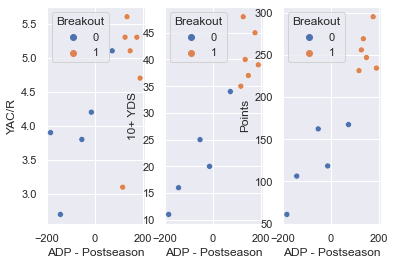

In [13]:
full_na_dropped = full.dropna(subset=['YAC/R'])

# fig, axes = plt.subplots(1, 3, sharex=True, figsize=(10,5))

# sns.scatterplot(data=full_na_dropped, x="YAC/R", y="ADP - Postseason", hue="Breakout")
# sns.scatterplot(data=full_na_dropped, x="10+ YDS", y="ADP - Postseason", hue="Breakout")
# sns.scatterplot(data=full_na_dropped, x="Points", y="ADP - Postseason", hue="Breakout")
# plt.show()

sns.set(rc={"figure.figsize":(20, 8)})
f, axarr = plt.subplots(1, 3)
sns.scatterplot(data=full_na_dropped, x="ADP - Postseason", y="YAC/R", hue="Breakout", ax=axarr[0])
sns.scatterplot(data=full_na_dropped, x="ADP - Postseason", y="10+ YDS", hue="Breakout", ax=axarr[1])
sns.scatterplot(data=full_na_dropped, x="ADP - Postseason", y="Points", hue="Breakout", ax=axarr[2])
plt.show()

# Finding Breakout Players

Filtered through the cleaned Wide Receiver dataset to find those who started the season with an Average Draft Pick greather than 150 yet ended the season with a rank less than 50, signifiying a large rise in their rank as a "Breakout" player.

In [71]:
# find breakout players by finding players that have ADP Greater Than 150 AND Post-Season Rk of Less Than 50
cond_ = (overall_merged_data_clean["ADP"] > 150) & (overall_merged_data_clean["Postseason_rank"] < 50)
breakouts = overall_merged_data_clean.loc[cond_,:]

stats_df = breakouts.groupby(['Year', 'Player'])
#stats_df.head(100)



,Preseason_rank,Player,ADP,Year,Postseason_rank,Position,Points,Games,PPG
7,8.0,Davante Adams,8.3,2021,8.0,WR,344.3,16.0,21.5
10,11.0,Tyreek Hill,11.0,2021,21.0,WR,296.5,17.0,17.4
15,16.0,Stefon Diggs,16.3,2021,23.0,WR,285.5,17.0,16.8
17,18.0,DK Metcalf,18.5,2021,39.0,WR,244.3,17.0,14.4
19,20.0,DeAndre Hopkins,19.8,2021,132.0,WR,147.2,10.0,14.7
...,...,...,...,...,...,...,...,...,...
3892,454.0,Stedman Bailey,458.0,2013,345.0,WR,41.6,15.0,2.8
3910,472.0,Eddie Royal,476.0,2013,119.0,WR,144.1,14.0,10.3
3914,476.0,Marvin Jones Jr.,480.0,2013,82.0,WR,171.6,15.0,11.4
3917,479.0,Jerricho Cotchery,483.0,2013,104.0,WR,154.2,15.0,10.3


# Previous Year Statistics for Breakout Players

Made a nested list with values of certain players and the year they broke out. Filtered through the wide reciever statistics data set to find the previous season before they broke out (some were only rookies and did not have a pre-existing season before their breakout, while others had their breakout season in 2013 and as such their statistics from the previous year were not available).

In [82]:
#nestedlist

# breakouts.loc[:, 'Year'] = breakouts['Year'].astype(int)
nameyear = breakouts[['Player', 'Year']].values.tolist()
print(nameyear)

columnnames = wr_table.columns.values
temp_table = pd.DataFrame(columns=columnnames)
empty_table = pd.DataFrame(columns= columnnames)

for name, year in nameyear:
    #newrow = 
    if newrow == wr_table.loc[(wr_table['Player'] == name) & (wr_table['Year'] == str(int(year) - 1))]:
        empty_table = pd.concat([empty_table, newrow])

display(empty_table)

[['Hunter Renfrow', '2021'], ['DeVante Parker', '2019'], ['Tyler Lockett', '2018'], ['Michael Thomas', '2016'], ['Davante Adams', '2016'], ['Michael Crabtree', '2015'], ['Doug Baldwin', '2015'], ['Odell Beckham Jr.', '2014'], ['Julian Edelman', '2013']]


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [60]:
pd.concat([breakouts, empty_table], axis = 0)

,Preseason_rank,Player,ADP,Year,Postseason_rank,Position,Points,Games,PPG,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS
331,332.0,Hunter Renfrow,296.0,2021,30.0,WR,259.1,17.0,15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,207.0,DeVante Parker,172.5,2019,40.0,WR,246.2,16.0,15.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1563,148.0,Tyler Lockett,158.4,2018,49.0,WR,222.4,16.0,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2402,146.0,Michael Thomas,155.0,2016,29.0,WR,255.7,15.0,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2447,191.0,Davante Adams,181.2,2016,34.0,WR,246.7,16.0,15.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2890,156.0,Michael Crabtree,161.2,2015,45.0,WR,231.2,16.0,14.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2903,168.0,Doug Baldwin,161.2,2015,27.0,WR,268.9,16.0,16.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3406,239.0,Odell Beckham Jr.,192.0,2014,17.0,WR,295.0,12.0,24.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3659,225.0,Julian Edelman,224.5,2013,36.0,WR,234.2,15.0,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,DeVante Parker,NaN,2018,NaN,NaN,NaN,NaN,NaN,12.9,9.0,9.0,3.9,1.5,11.0,3.0,3.0,1.0,0.0


# Summary Statistics

The summary statistics for the year before a breakout player's breakout for number of plays over a respective number of yards (10, 20, 30, 40, 50).

In [61]:
full_na_dropped.describe()

,Y/R,YBC/R,AIR/R,YAC/R,YACON/R,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS,Preseason_rank,ADP,Postseason_rank,Points,Games,PPG,Breakout,ADP - Postseason
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,12.027273,7.572727,7.572727,4.436364,0.963636,31.818182,11.818182,4.363636,2.272727,1.000000,152.272727,149.718182,98.272727,195.154545,14.727273,13.245455,0.545455,51.445455
std,1.562108,1.098263,1.098263,0.966719,0.910245,12.106347,5.381787,2.013590,1.678744,1.341641,59.150809,51.851091,95.515539,76.316399,1.848833,5.524738,0.522233,129.798400
min,9.700000,5.300000,5.300000,2.700000,0.000000,11.000000,3.000000,2.000000,0.000000,0.000000,48.000000,48.600000,17.000000,60.900000,11.000000,5.500000,0.000000,-183.600000
25%,10.550000,7.000000,7.000000,3.850000,0.000000,22.500000,7.500000,3.000000,1.000000,0.000000,132.500000,142.200000,31.500000,140.250000,14.000000,9.150000,0.000000,-33.700000
50%,12.400000,7.700000,7.700000,4.700000,1.100000,35.000000,15.000000,4.000000,2.000000,0.000000,156.000000,161.200000,45.000000,231.200000,16.000000,14.500000,1.000000,116.200000
75%,13.100000,8.150000,8.150000,5.200000,1.650000,39.500000,16.000000,5.500000,3.000000,2.000000,179.500000,174.850000,138.000000,251.200000,16.000000,16.200000,1.000000,140.700000
max,14.300000,9.000000,9.000000,5.600000,2.200000,48.000000,18.000000,8.000000,6.000000,4.000000,239.000000,224.500000,313.000000,295.000000,16.000000,24.600000,1.000000,188.500000


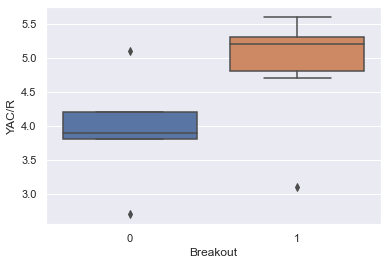

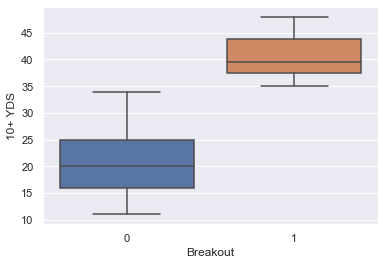

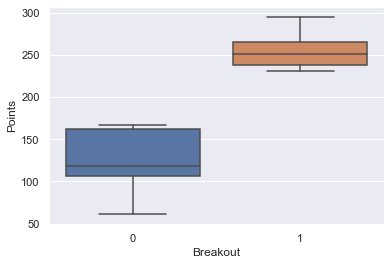

In [62]:
breakout_bx = full_na_dropped.loc[full_na_dropped['Breakout'] == 1]

# f, axarr = plt.subplots(1, 2)
sns.boxplot(data=full_na_dropped, x='Breakout', y='YAC/R', orient="v")
plt.show()
sns.boxplot(data=full_na_dropped, x='Breakout', y='10+ YDS', orient="v")
plt.show()
sns.boxplot(data=full_na_dropped, x='Breakout', y='Points', orient="v")
plt.show()

In [63]:
breakouts_summary_bigplays = empty_table[["10+ YDS", "20+ YDS", "30+ YDS", "40+ YDS", "50+ YDS"]].describe()
b_bigplays_k = list(breakouts_summary_bigplays.keys())
b_bigplays_mean = breakouts_summary_bigplays.iloc[1]
breakouts_summary_bigplays

,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS
count,5.00000,5.000000,5.000000,5.00000,5.000000
mean,21.20000,7.800000,3.000000,1.80000,0.600000
std,8.81476,4.764452,0.707107,0.83666,0.894427
min,11.00000,3.000000,2.000000,1.00000,0.000000
25%,16.00000,5.000000,3.000000,1.00000,0.000000
50%,20.00000,6.000000,3.000000,2.00000,0.000000
75%,25.00000,10.000000,3.000000,2.00000,1.000000
max,34.00000,15.000000,4.000000,3.00000,2.000000


In [64]:
breakouts_summary_stat = empty_table[["Y/R", "YBC/R", "AIR/R", "YAC/R", "YACON/R"]].describe()
b_stat_k = list(breakouts_summary_stat.keys())
b_stat_mean = breakouts_summary_stat.iloc[1]
breakouts_summary_stat

,Y/R,YBC/R,AIR/R,YAC/R,YACON/R
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,11.540000,7.600000,7.600000,3.940000,0.600000
std,1.438054,1.007472,1.007472,0.861974,0.674537
min,9.700000,6.500000,6.500000,2.700000,0.000000
25%,10.300000,6.900000,6.900000,3.800000,0.000000
50%,12.300000,7.400000,7.400000,3.900000,0.400000
75%,12.500000,8.200000,8.200000,4.200000,1.100000
max,12.900000,9.000000,9.000000,5.100000,1.500000


The summary statistics compiled for all wide receivers for number of plays over a respective number of yards (10, 20, 30, 40, 50).

In [65]:
overall_summary_bigplays = wr_table[["10+ YDS", "20+ YDS", "30+ YDS", "40+ YDS", "50+ YDS"]].describe()
os_bigplays_k = list(overall_summary_bigplays.keys())
os_bigplays_mean = overall_summary_bigplays.iloc[1]
overall_summary_bigplays

,10+ YDS,20+ YDS,30+ YDS,40+ YDS,50+ YDS
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,17.833033,6.013213,2.495495,1.268468,0.577778
std,15.820120,5.959182,2.837995,1.732223,0.990998
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,0.000000,0.000000
50%,13.000000,4.000000,2.000000,1.000000,0.000000
75%,28.000000,10.000000,4.000000,2.000000,1.000000
max,79.000000,31.000000,16.000000,13.000000,8.000000


In [66]:
overall_summary_r = wr_table[["Y/R", "YBC/R", "AIR/R", "YAC/R", "YACON/R"]].describe()
os_stat_k = list(overall_summary_r.keys())
os_stat_mean = overall_summary_r.iloc[1]
overall_summary_r

,Y/R,YBC/R,AIR/R,YAC/R,YACON/R
count,1665.000000,1665.000000,1665.000000,1665.000000,1665.000000
mean,12.786126,8.484925,8.484925,4.279760,0.987748
std,4.209088,3.858855,3.858855,2.192345,1.071694
min,-3.000000,-5.300000,-5.300000,0.000000,-0.200000
25%,10.400000,6.300000,6.300000,3.000000,0.000000
50%,12.500000,8.100000,8.100000,4.100000,0.900000
75%,14.700000,10.500000,10.500000,5.200000,1.400000
max,47.000000,37.000000,37.000000,25.500000,15.500000


# Graph comparing Mean Yards

Created bar plot demonstrating differences in mean number of big plays based on yardage between wide receivers as a whole (overall) and breakout wide receivers.

In [ ]:
osdf = pd.DataFrame({'Yards': os_bigplays_k, 'Mean': os_bigplays_mean})
bdf = pd.DataFrame({'Yards': b_bigplays_k, 'Mean': b_bigplays_mean})

osdf['Player Group'] = 'Overall'
bdf['Player Group'] = 'Breakout'

final = pd.concat([osdf, bdf])
sns.barplot(x='Yards', y='Mean', data=final, hue='Player Group')
plt.show()

osdf = pd.DataFrame({'Statistics': os_stat_k, 'Mean': os_stat_mean})
bdf = pd.DataFrame({'Statistics': b_stat_k, 'Mean': b_stat_mean})

osdf['Player Group'] = 'Overall'
bdf['Player Group'] = 'Breakout'

final = pd.concat([osdf, bdf])
sns.barplot(x='Statistics', y='Mean', data=final, hue='Player Group')
plt.show()

# Predicting Breakout Players for the 2022-2023 Season

After finding the variables that best indicate a potential breakout player. We look into the wide receivers from the 2021 season to compare their statistics to what makes a breakout player. 

# Data Limitation

The major limitation to our data are the non-quantifiable factors that can affect a player’s performance. These include factors such as injury that can occur at any point in the season or off-season and vary in severity, the chemistry between the wide receiver and his quarterback as better chemistry would allow for better overall performance, that a breakout player could be in their rookie season and not have any prior data, and the personal factors that might affect the players’ ability in games. These are all subjective factors that cannot be put down as data, thus limiting the accuracy of our analysis and predictions. 

We only looked back to 2013, as more advanced statistics started to be measured then. These advanced statistics include yards per reception (Y/R), yards before contact with an opponent per reception (YBC/R), the distance the ball traveled in the air per reception (AIR/R), yards after catch per reception (YAC/R),  yards after contact per reception (YACON/R), number of plays that were greater than a certain distance (10+ YDS, 20+ YDS, 30+ YDS, 40+ YDS, 50+ YDS). We believe that these statistics will give us a better understanding of the similar performance on a per reception basis between different breakout players compared to using more basic statistics such as total yards. 

As a result of wanting to look into the more advanced statistics, we are limited to up to the year 2013. Breakout players are something that don’t occur often which means that we won’t find many players that fit both our breakout player criteria and broke out after 2013. This is why we limited our data to only wide receivers, who historically have the most breakout players compared to any other position. By having more breakout players we would have more data to compare between each other and against current players. There are breakout players in other positions and data on them but only a fraction of how many players that breakout in the wide receiver position. 


# Data Citation
Fantasy football ADP datasets from 2012 to 2022. This is used to determine whether a player fell under the parameters of a breakout player. This is public data that is free to use provided by fantasypros.
- https://www.fantasypros.com/nfl/adp/overall.php?year=2012
- https://www.fantasypros.com/nfl/adp/overall.php?year=2013
- https://www.fantasypros.com/nfl/adp/overall.php?year=2014
- https://www.fantasypros.com/nfl/adp/overall.php?year=2015
- https://www.fantasypros.com/nfl/adp/overall.php?year=2016
- https://www.fantasypros.com/nfl/adp/overall.php?year=2017
- https://www.fantasypros.com/nfl/adp/overall.php?year=2018
- https://www.fantasypros.com/nfl/adp/overall.php?year=2019 
- https://www.fantasypros.com/nfl/adp/overall.php?year=2020 
- https://www.fantasypros.com/nfl/adp/overall.php?year=2021
- https://www.fantasypros.com/nfl/adp/overall.php?year=2022

Player Ranking Data from 2012 to 2022. This is used to determine the post-season ranking based on a ppr style fantasy football. This is public data that is free to use provided by fantasypros. 
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2012
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2013
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2014
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2015
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2016
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2017
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2018
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2019
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2020
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2021
- https://www.fantasypros.com/nfl/reports/leaders/ppr.php?year=2022

Wide receiver advanced statistics from 2013 to 2022. This is used to compare the wide receiver advanced statistics between breakout players. This is public data that is free to use provided by fantasypros. 
- https://www.fantasypros.com/nfl/advanced-stats-wr.php?year=2022
- https://www.fantasypros.com/nfl/advanced-stats-wr.php?year=2021
- https://www.fantasypros.com/nfl/advanced-stats-wr.php?year=2020
- https://www.fantasypros.com/nfl/advanced-stats-wr.php?year=2019
- https://www.fantasypros.com/nfl/advanced-stats-wr.php?year=2018
- https://www.fantasypros.com/nfl/advanced-stats-wr.php?year=2017
- https://www.fantasypros.com/nfl/advanced-stats-wr.php?year=2016
- https://www.fantasypros.com/nfl/advanced-stats-wr.php?year=2015
- https://www.fantasypros.com/nfl/advanced-stats-wr.php?year=2014
- https://www.fantasypros.com/nfl/advanced-stats-wr.php?year=2013
